In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/housing_data_sold.csv')
df.head()

,Bedrooms,Area,City_Distance,Age,Price,sold_10
0,1,26.184098,1286.68,67,96004.804557,1
1,1,34.866901,1855.25,30,92473.722570,1
2,1,36.980709,692.09,24,98112.519940,1
3,1,17.445723,1399.49,66,92118.326874,1
4,1,52.587646,84.65,3,98976.653176,1


In [3]:
X = df.drop(['Price', 'sold_10'], axis=1)
y = df['Price']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=630)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.regularizers import l1
## dropout performs regularization by zeroing out weights randomly
## impose an L1 norm or L2 norm by layer

model = Sequential()
model.add(Input(shape = (X_train.shape[1],)))                                               ## input
model.add(Dense(20, activation = "relu", kernel_regularizer=l1()))                                                  ## hidden 1
model.add(Dropout(0.2))                                                                     ## regularization
model.add(Dense(1,
                activation = "linear",
                kernel_regularizer=l1(),
                kernel_initializer = GlorotUniform(seed = 630)))  ## output

In [30]:
## w1, b1 (input to hidden 1)
## w2, b2 (hidden to output)
w1, b1, w2, b2 = model.get_weights()

In [31]:
w1

array([[ 0.35203397, -0.28223968,  0.13594532, -0.15798128, -0.2676487 ,
         0.23714888,  0.3536389 , -0.4222051 , -0.21401393, -0.12762547,
        -0.04805481,  0.39584184,  0.36670995,  0.10973895,  0.42062104,
        -0.478554  , -0.42771125, -0.07686484, -0.31525552,  0.45085955],
       [-0.3729509 , -0.36557925,  0.14388323, -0.3255087 , -0.45975673,
         0.24340093, -0.38886797,  0.13532364,  0.09292865,  0.44374692,
         0.4937451 , -0.25306904, -0.29064488, -0.00293124,  0.0758723 ,
        -0.29669726, -0.49061763, -0.13745487, -0.38328135,  0.09758615],
       [-0.13519347, -0.27920008, -0.20898175, -0.15365314, -0.32457817,
        -0.2097795 ,  0.4625132 ,  0.317711  , -0.06564021,  0.09093654,
         0.00913656,  0.09517777,  0.11343229,  0.31178498,  0.21265435,
        -0.2866254 , -0.23284829, -0.46247554,  0.06330073,  0.02393472],
       [-0.08528614,  0.05400336, -0.418903  ,  0.46917605, -0.17546415,
         0.2634436 , -0.03207195, -0.10563886, -

In [32]:
b1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [33]:
w2

array([[-0.10402411],
       [-0.17933178],
       [ 0.43566376],
       [-0.30346125],
       [ 0.29060102],
       [-0.46766013],
       [-0.20736516],
       [ 0.3760358 ],
       [-0.39851725],
       [-0.15913686],
       [-0.21035594],
       [-0.1081259 ],
       [ 0.23224795],
       [ 0.16697979],
       [-0.2776198 ],
       [-0.01721281],
       [ 0.2604028 ],
       [ 0.4268152 ],
       [-0.5273807 ],
       [ 0.2714367 ]], dtype=float32)

In [34]:
b2

array([0.], dtype=float32)

In [35]:
import tensorflow as tf

In [36]:
## compilation
## cost (loss function)
## metrics (additional loss functions (RMSE, MAE), gain functions (R2, explained variance))
## loss MSE (squared errors) vs MAE (absolute errors) needs to be differentiable (compute the gradient)
## callback is special function (allow to stop, retrieve the epoch with the best loss)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## create an instance of early stopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

model.compile(optimizer = Adam(learning_rate = 0.3), loss = 'mse',metrics = ['mean_absolute_error', "r2_score"])

In [40]:
X_train.shape
3015 / 10

301.5

In [43]:
## fit
## number of epochs (full passes on the data)
## validation learning (validation_split or validation_data)
## add early stopping to the fit function

history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks=[early_stop], batch_size = 10)

Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28656184.0000 - mean_absolute_error: 4114.6304 - r2_score: -0.7672 - val_loss: 7819409.5000 - val_mean_absolute_error: 2050.6873 - val_r2_score: 0.5035
Epoch 2/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 49156820.0000 - mean_absolute_error: 4571.4238 - r2_score: -2.3008 - val_loss: 14380837.0000 - val_mean_absolute_error: 3043.9165 - val_r2_score: 0.0870
Epoch 3/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16407433.0000 - mean_absolute_error: 3063.9868 - r2_score: -0.0579 - val_loss: 8128463.5000 - val_mean_absolute_error: 2204.2170 - val_r2_score: 0.4839
Epoch 4/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 25070228.0000 - mean_absolute_error: 3661.2820 - r2_score: -0.6782 - val_loss: 7982420.5000 - val_mean_absolute_error: 2200.0793 - val_r2_score: 0.4932
Epoch 5/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16410841.0000 - mean_absolute_error: 3077.7910 - r2_score: -0.0697 - val_loss: 1195668

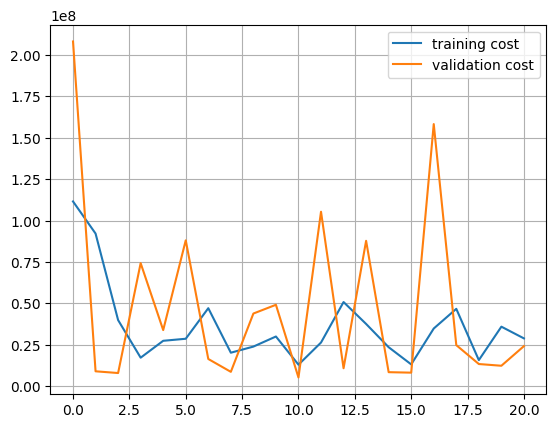

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = "training cost")
plt.plot(history.history['val_loss'], label = "validation cost")
plt.legend()
plt.grid()
plt.show()

In [18]:
## learning too slow?
## learning rate is too low
## what if after certain epochs metrics are not good?
## get a deeper model (hidden layers)
## run for more epochs